### EDA Cardano

Dataset from [Kaggle](https://www.kaggle.com/datasets/varpit94/cardano-data) 

In [1]:
# Import libraries to read data

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (6, 4), 'figure.dpi': 120})

In [2]:
# Data URL

url_card = '../data/ADA-USD.csv'

In [3]:
# Create Dataset

cardano = pd.read_csv(url_card)
cardano.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1593,2022-03-21,0.877201,0.927599,0.865919,0.916782,0.916782,1233477886
1594,2022-03-22,0.916888,0.985033,0.909592,0.976440,0.976440,1699537576
1595,2022-03-23,0.976162,1.107482,0.959068,1.107482,1.107482,3447683427
1596,2022-03-24,1.107204,1.185751,1.085422,1.130011,1.130011,3671006856
1597,2022-03-25,1.131003,1.162346,1.095253,1.107894,1.107894,2845730816


In [4]:
cardano.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [5]:
cardano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1598 non-null   object 
 1   Open       1598 non-null   float64
 2   High       1598 non-null   float64
 3   Low        1598 non-null   float64
 4   Close      1598 non-null   float64
 5   Adj Close  1598 non-null   float64
 6   Volume     1598 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 87.5+ KB


In [6]:
cardano.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1.598000e+03
mean,0.484421,0.506568,0.460876,0.485099,0.485099,1.207042e+09
std,0.670545,0.699241,0.640042,0.670711,0.670711,2.202736e+09
min,0.023954,0.025993,0.019130,0.023961,0.023961,2.930550e+06
25%,0.053023,0.055959,0.051386,0.053311,0.053311,6.421904e+07
50%,0.113265,0.118593,0.106945,0.113522,0.113522,1.851726e+08
75%,0.856796,0.903917,0.818793,0.858310,0.858310,1.374642e+09
max,2.966390,3.099186,2.907606,2.968239,2.968239,1.914198e+10


In [7]:
cardano['Date'] = pd.to_datetime(cardano['Date'])

cardano.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [8]:
cardano.set_index(['Date'], inplace=True)

cardano.index.is_unique

True

In [9]:
# Check the older and newer date in both Dataset
print("Cardano older date: ",cardano.index.min(),"\nCardano newer date: ",cardano.index.max())


Cardano older date:  2017-11-09 00:00:00 
Cardano newer date:  2022-03-25 00:00:00


In [10]:
# Create the pct_change column
cardano['Return'] = cardano['Adj Close'].pct_change()

In [11]:
cardano.head()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2017-11-09,0.025160,0.035060,0.025006,0.032053,0.032053,18716200,NaN
2017-11-10,0.032219,0.033348,0.026451,0.027119,0.027119,6766780,-0.153933
2017-11-11,0.026891,0.029659,0.025684,0.027437,0.027437,5532220,0.011726
2017-11-12,0.027480,0.027952,0.022591,0.023977,0.023977,7280250,-0.126107
2017-11-13,0.024364,0.026300,0.023495,0.025808,0.025808,4419440,0.076365


In [12]:
np.mean(cardano['Return'])

0.004830282616761793

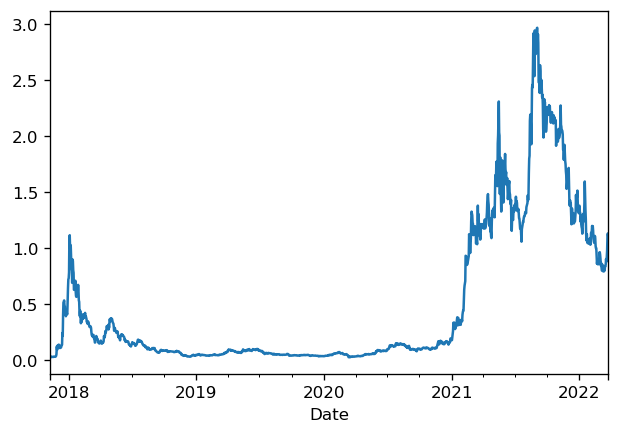

In [13]:
# Plotting closing prices

cardano['Adj Close'].plot(style=['-']);

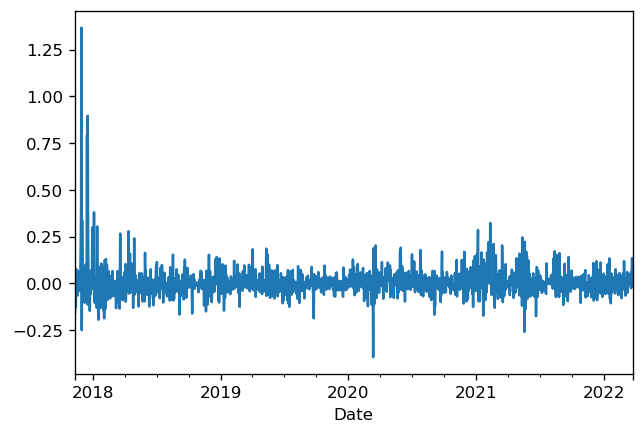

In [14]:
cardano['Return'].plot(style=['-']);

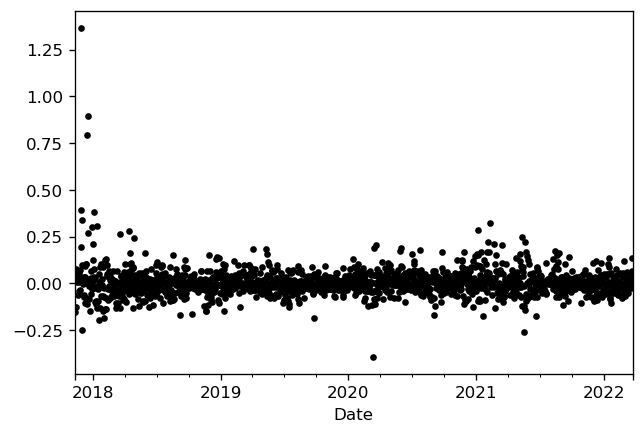

In [15]:
cardano['Return'].plot(style = 'k.');

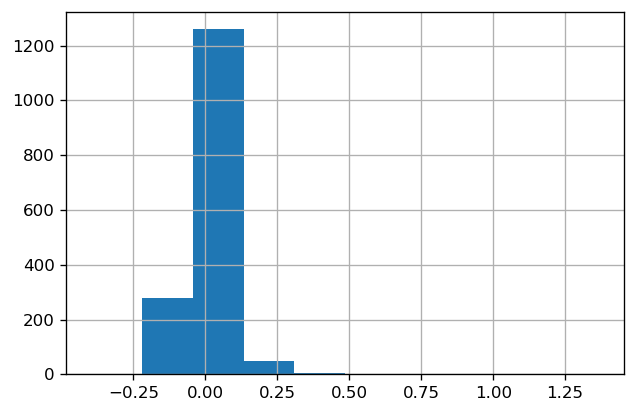

In [16]:
cardano['Return'].hist();

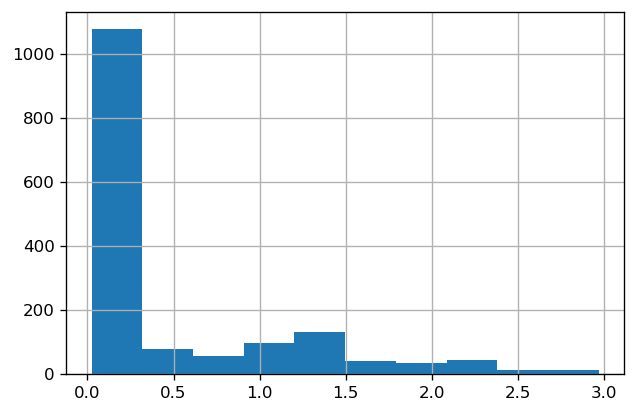

In [17]:
cardano['Adj Close'].hist();

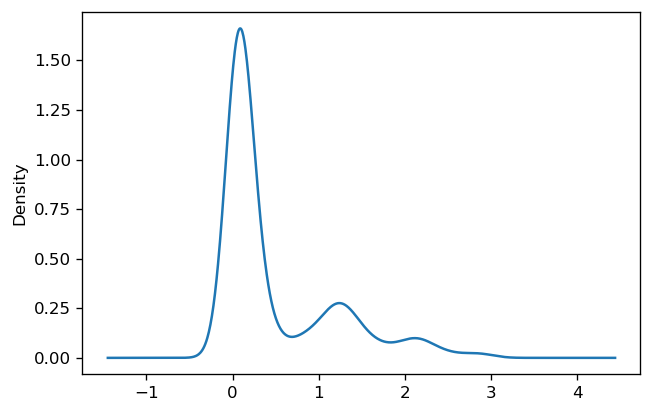

In [18]:
# Kernel density

cardano['Adj Close'].plot(kind='kde');

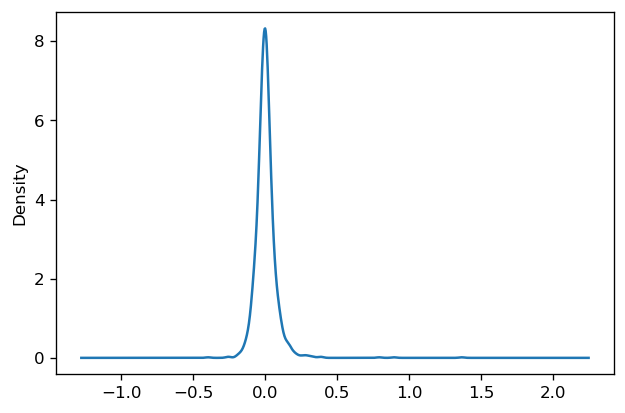

In [19]:
cardano['Return'].plot(kind='kde');

C:\Users\Carmelo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


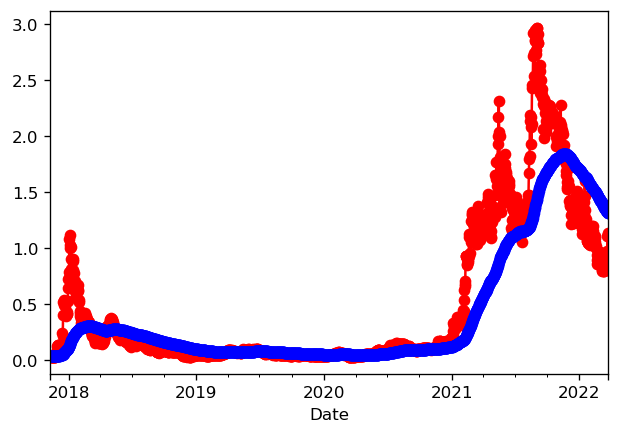

In [20]:
# Exponential smoothing

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(cardano['Adj Close']).fit(smoothing_level=.01, optimized=False)

cardano['Adj Close'].plot(marker='o',color='red')
model.fittedvalues.plot(marker='o', color='blue');

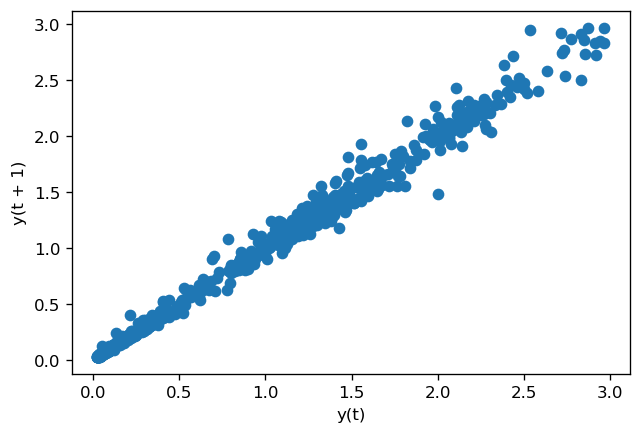

In [21]:
# Log plot to check if the series is random

from pandas.plotting import lag_plot

lag_plot(cardano['Adj Close']);

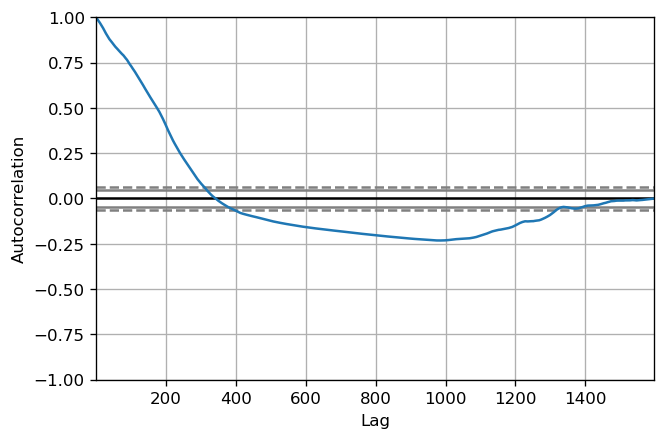

In [22]:
# Autocorrelation plot

from pandas.plotting import autocorrelation_plot

autocorrelation_plot(cardano['Adj Close']);